# Pandas intro

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Creating a Series
s = pd.Series([2, -3, 1, 5])
s

0    2
1   -3
2    1
3    5
dtype: int64

In [3]:
np.exp(s)

0      7.389056
1      0.049787
2      2.718282
3    148.413159
dtype: float64

In [4]:
s + [100, 200, 300, 400]

0    102
1    197
2    301
3    405
dtype: int64

In [5]:
s + 100

0    102
1     97
2    101
3    105
dtype: int64

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. 

By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [8]:
s2["bob"]

83

In [9]:
s2[2]

112

loc:
To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

In [12]:
s2.iloc[2:3]  #No.2 is not included

charles    112
dtype: int64

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


In [16]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [17]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [18]:
# again:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [19]:
# s2 is equivalent to s3

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [20]:
s4 = pd.Series(weights, index=["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [21]:
print(s2.keys())
print(s3.keys())

s3 + s2

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [22]:
s5 = pd.Series([1000, 1000, 1000, 1000])

s5.values

array([1000, 1000, 1000, 1000])

In [23]:
s2.values

array([ 68,  83, 112,  68])

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [24]:
meaning = pd.Series(43, ["life", "universe", "everything"])
meaning

life          43
universe      43
everything    43
dtype: int64

In [25]:
# Serise name
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

In [26]:
# plotting & series （not necessary)

<AxesSubplot:>

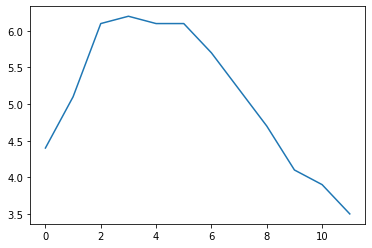

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name="temperature")
s7.plot()

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [28]:
dates = pd.date_range("2018/8/1 16:00", periods=12,
                      freq='H')  # ,freq= T S M W,try
dates

DatetimeIndex(['2018-08-01 16:00:00', '2018-08-01 17:00:00',
               '2018-08-01 18:00:00', '2018-08-01 19:00:00',
               '2018-08-01 20:00:00', '2018-08-01 21:00:00',
               '2018-08-01 22:00:00', '2018-08-01 23:00:00',
               '2018-08-02 00:00:00', '2018-08-02 01:00:00',
               '2018-08-02 02:00:00', '2018-08-02 03:00:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [29]:
temp_series = pd.Series(temperatures, dates)
temp_series

2018-08-01 16:00:00    4.4
2018-08-01 17:00:00    5.1
2018-08-01 18:00:00    6.1
2018-08-01 19:00:00    6.2
2018-08-01 20:00:00    6.1
2018-08-01 21:00:00    6.1
2018-08-01 22:00:00    5.7
2018-08-01 23:00:00    5.2
2018-08-02 00:00:00    4.7
2018-08-02 01:00:00    4.1
2018-08-02 02:00:00    3.9
2018-08-02 03:00:00    3.5
Freq: H, dtype: float64

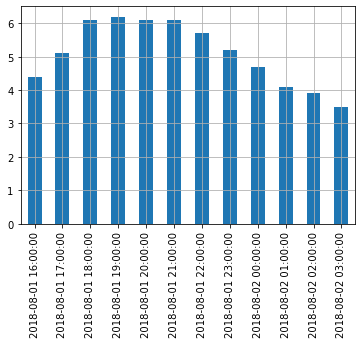

In [30]:
# plot the Series
temp_series.plot(kind="bar")

plt.grid(True)  #no more plt.show()

In [31]:
# Now we can rethink the seires meaning, it's inclusive and usefull, you can combine various arrays

<AxesSubplot:>

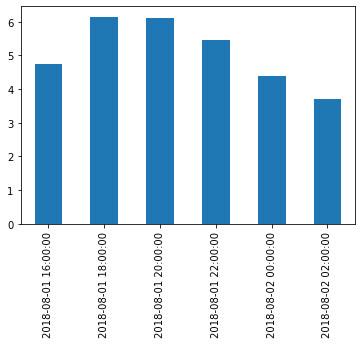

In [32]:
# Resampling
temp_series_freq_2H = temp_series.resample("2H")  #0.5H 1.5H 2H 3H 5H
temp_series_freq_2H = temp_series_freq_2H.mean()  # slice sampling
temp_series_freq_2H.plot(kind="bar")

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [33]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2018-08-01 16:00:00    4.4
2018-08-01 18:00:00    6.1
2018-08-01 20:00:00    6.1
2018-08-01 22:00:00    5.2
2018-08-02 00:00:00    4.1
2018-08-02 02:00:00    3.5
Freq: 2H, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [34]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2018-08-01 16:00:00    4.4
2018-08-01 18:00:00    6.1
2018-08-01 20:00:00    6.1
2018-08-01 22:00:00    5.2
2018-08-02 00:00:00    4.1
2018-08-02 02:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [35]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(
    n=10
)  # `head` displays the top n values,everytime begin with the initial value

2018-08-01 16:00:00    4.4
2018-08-01 16:15:00    NaN
2018-08-01 16:30:00    NaN
2018-08-01 16:45:00    NaN
2018-08-01 17:00:00    5.1
2018-08-01 17:15:00    NaN
2018-08-01 17:30:00    NaN
2018-08-01 17:45:00    NaN
2018-08-01 18:00:00    6.1
2018-08-01 18:15:00    NaN
Freq: 15T, dtype: float64

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [36]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(
    method="cubic")
temp_series_freq_15min.head(n=10)

2018-08-01 16:00:00    4.400000
2018-08-01 16:15:00    4.452911
2018-08-01 16:30:00    4.605113
2018-08-01 16:45:00    4.829758
2018-08-01 17:00:00    5.100000
2018-08-01 17:15:00    5.388992
2018-08-01 17:30:00    5.669887
2018-08-01 17:45:00    5.915839
2018-08-01 18:00:00    6.100000
2018-08-01 18:15:00    6.203621
Freq: 15T, dtype: float64

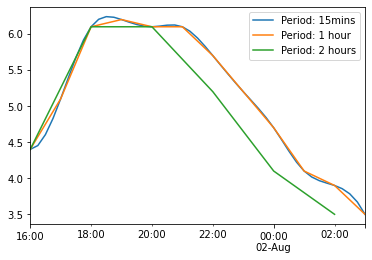

In [37]:
temp_series_freq_15min.plot(label="Period: 15mins")
temp_series.plot(label="Period: 1 hour")
temp_series_freq_2H.plot(label="Period: 2 hours")

plt.legend()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2018-08-01 02:30 might mean August 1st 2018 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [38]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2018-08-01 16:00:00-04:00    4.4
2018-08-01 17:00:00-04:00    5.1
2018-08-01 18:00:00-04:00    6.1
2018-08-01 19:00:00-04:00    6.2
2018-08-01 20:00:00-04:00    6.1
2018-08-01 21:00:00-04:00    6.1
2018-08-01 22:00:00-04:00    5.7
2018-08-01 23:00:00-04:00    5.2
2018-08-02 00:00:00-04:00    4.7
2018-08-02 01:00:00-04:00    4.1
2018-08-02 02:00:00-04:00    3.9
2018-08-02 03:00:00-04:00    3.5
dtype: float64

In [39]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2018-08-01 22:00:00+02:00    4.4
2018-08-01 23:00:00+02:00    5.1
2018-08-02 00:00:00+02:00    6.1
2018-08-02 01:00:00+02:00    6.2
2018-08-02 02:00:00+02:00    6.1
2018-08-02 03:00:00+02:00    6.1
2018-08-02 04:00:00+02:00    5.7
2018-08-02 05:00:00+02:00    5.2
2018-08-02 06:00:00+02:00    4.7
2018-08-02 07:00:00+02:00    4.1
2018-08-02 08:00:00+02:00    3.9
2018-08-02 09:00:00+02:00    3.5
dtype: float64

In [40]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2018-08-01 22:00:00    4.4
2018-08-01 23:00:00    5.1
2018-08-02 00:00:00    6.1
2018-08-02 01:00:00    6.2
2018-08-02 02:00:00    6.1
2018-08-02 03:00:00    6.1
2018-08-02 04:00:00    5.7
2018-08-02 05:00:00    5.2
2018-08-02 06:00:00    4.7
2018-08-02 07:00:00    4.1
2018-08-02 08:00:00    3.9
2018-08-02 09:00:00    3.5
dtype: float64

In [41]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [42]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2018-08-01 22:00:00+02:00    4.4
2018-08-01 23:00:00+02:00    5.1
2018-08-02 00:00:00+02:00    6.1
2018-08-02 01:00:00+02:00    6.2
2018-08-02 02:00:00+02:00    6.1
2018-08-02 03:00:00+02:00    6.1
2018-08-02 04:00:00+02:00    5.7
2018-08-02 05:00:00+02:00    5.2
2018-08-02 06:00:00+02:00    4.7
2018-08-02 07:00:00+02:00    4.1
2018-08-02 08:00:00+02:00    3.9
2018-08-02 09:00:00+02:00    3.5
dtype: float64

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [43]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [44]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

In [45]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

In [46]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410],
                              index=quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

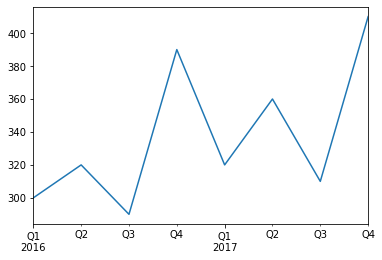

In [47]:
quarterly_revenue.plot(kind="line")
plt.show()

<AxesSubplot:>

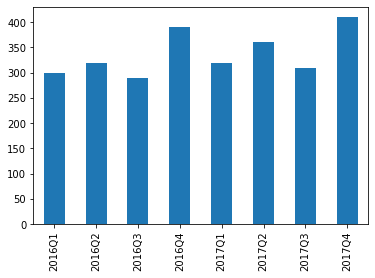

In [48]:
quarterly_revenue.plot(kind="bar")

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [49]:
people_dict = {
    "weight":
        pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear":
        pd.Series([1984, 1985, 1992],
                  index=["bob", "alice", "charles"],
                  name="year"),
    "children":
        pd.Series([0, 3], index=["charles", "bob"]),
    "hobby":
        pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [50]:
people['birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [51]:
people["weight"]

alice       68
bob         83
charles    112
Name: weight, dtype: int64

In [52]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [53]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [54]:
values = [[1985, np.nan, "biking", 68], [1984, 3, "Dancing", 83],
    [1992, 0, np.nan, 112]]
d3 = pd.DataFrame(values,
                                    columns=["birthyear", "children", "hobby", "weight"],   #be cautious of the comma ,
                                    index=["alice", "bob", "charles"])
d3

,birthyear,children,hobby,weight
alice,1985,NaN,biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [55]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0,2), (1,2)] = np.ma.masked
d3 = pd.DataFrame(masked_array,
                                columns=["birthyear", "children", "hobby", "weight"],
                                index=["alice", "bob", "charles"])
d3

<ipython-input-55-b1ba39dd8a52>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masked_array = np.ma.asarray(values, dtype=np.object)


,birthyear,children,hobby,weight
alice,1985,NaN,biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [56]:
d4 = pd.DataFrame(d3,columns=["hobby", "children"], index=["alice", "bob"])
d4

,hobby,children
alice,biking,NaN
bob,Dancing,3


Create a dataframe with a dictionary:

In [57]:
people = pd.DataFrame({
    "birthyear":{
        "alice": 1985,
        "bob": 1984,
        "charles": 1992
    },
    "hobby": {
        "alice": "Biking",
        "bob": "Dancing"
    },
    "weight": {
        "alice": 68,
        "bob": 83,
        "charles": 112
    },
    "children": {
        "bob": 3,
        "charles": 0
    }
})

people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [58]:
# MultiIndex
d5 = pd.DataFrame({
    ("public", "birhtyear"):{
        ("Paris", "alice"):1985,
         ("Paris", "bob"):1984,
        ("London", "charles"): 1992
    },
    ("public", "hobby"): {
        ("Paris", "alice"): "Biking",
        ("Paris", "bob"): "Dancing"
    },
    ("private", "weight"): {
        ("Paris", "alice"): 68,
        ("Paris", "bob"): 83,
        ("London", "charles"): 112
    },
    ("private", "children"): {
        ("Paris", "alice"): np.nan,
        ("Paris", "bob"): 3,
        ("London", "charles"): 0
    }
})
d5

public          private         
               birhtyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [59]:
d5["public"]

birhtyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [60]:
d5["public",  "hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [61]:
d5

public          private         
               birhtyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [62]:
# There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):
d5.columns = d5.columns.droplevel(level=0)
d5


birhtyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [63]:
# Transposing:just .T!

In [64]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birhtyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [65]:
d7 = d6.stack()
d7

London    Paris
birhtyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

In [66]:
d6

Paris           London
            alice      bob charles
birhtyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [67]:
d8 = d7.unstack() 
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birhtyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

In [68]:
d9 = d8.unstack()
d9

London  alice    birhtyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birhtyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birhtyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
Paris   alice    birhtyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birhtyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birhtyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:


In [69]:
d10 = d9.unstack(level=(0, 1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birhtyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:



In [70]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:


In [71]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [72]:
people.iloc[:0]

,birthyear,hobby,weight,children


In [73]:
people.iloc[0]

birthyear      1985
hobby        Biking
weight           68
children        NaN
Name: alice, dtype: object

In [74]:
people.iloc[1:2]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0


In [75]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [76]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [77]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [78]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [79]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30  # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [80]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [81]:
people["pets"] = pd.Series({
    "bob": 0,
    "charles": 5,
    "eugene": 1
})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [82]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [83]:
people.assign(body_mass_index=people["weight"] / (people["height"] / 100)**2,
              has_pets=people["pets"] > 0)
#people["pets"]>0 : transfer to boolean
#BMI:body_mass_index

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Note that you cannot access columns created within the same assignment:

In [84]:
try:
    people.assign(BMI=people["weight"]/ (people["height"]/100)**2,
                                    overweight=people["BMI"] >25)
except KeyError as e:
    print("Key error:", e)

Key error: 'BMI'


The solution is to split this assignment in two consecutive assignments:

In [85]:
d6 = people.assign(BMI=people["weight"]/ (people["height"]/100)**2)
d6.assign(overweight=d6["BMI"] > 25)

,hobby,height,weight,age,over 30,pets,BMI,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [86]:
try:
    (people.assign(body_mass_index=people["weight"] /
                   (people["height"] / 100)**2).assign(
                       overweight=people["body_mass_index"] > 25))
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [87]:
(people.assign(
    body_mass_index=lambda df: df["weight"] / (df["height"] / 100)**2).assign(
        overweight=lambda df: df["body_mass_index"] > 25))

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [88]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [89]:
# modify the dataframe with inplace
people.eval("body_mass_index = weight/(height/100)**2",inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


In [90]:
# or in another way:
overweight_threshold = 30
people.eval("overweight=body_mass_index >@overweight_threshold",
                                    inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Querying the dataframe
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [91]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


### Sorting the dataframe

In [92]:
people.sort_index(ascending=True)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [93]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


In [94]:
people.sort_index(axis=0,inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [95]:
people.sort_index(axis=1,inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [96]:
people.sort_values(by="age",inplace=False)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [97]:
people.sort_values(by="age",inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


<AxesSubplot:xlabel='body_mass_index'>

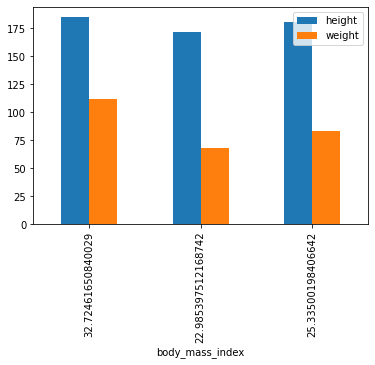

In [98]:
# plotting & dataframe
people.plot(kind="bar", x="body_mass_index", y = ["height","weight"])


<AxesSubplot:xlabel='body_mass_index'>

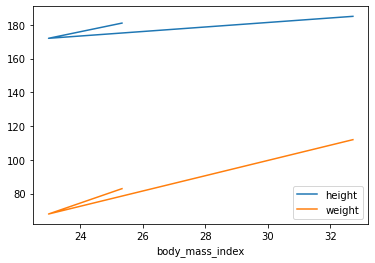

In [99]:
people.plot(kind="line", x="body_mass_index", y=["height", "weight"])

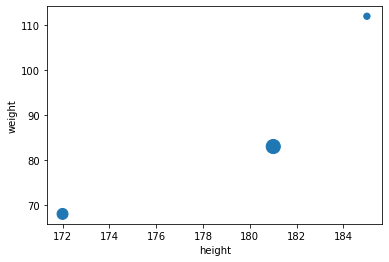

In [100]:
people.plot(kind="scatter", x="height", y="weight", s=[40, 120, 200])
plt.show()

In [101]:
# Check out the visualization

In [102]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array,
                                            columns=['sep', 'oct', 'nov'],
                                            index=['alice','bob','charles','darwin'])
grades


,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [103]:
# we can directly appy numpy functions:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [104]:
100* np.log10(grades) #the trick of grades

,sep,oct,nov
alice,90.308999,90.308999,95.424251
bob,100.000000,95.424251,95.424251
charles,60.205999,90.308999,30.103000
darwin,95.424251,100.000000,100.000000


In [105]:
grades > 6

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [106]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [107]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [108]:
# likewise , we can subtract the global mean:
grades- grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


the `all` is a method we can make aggregation operation: it can check the value whether they fit our condition:

In [109]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

now we intro the `axis`：you can specify the aixs of dataframe you want the operation excuted.

In [110]:
grades #show me the money

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [111]:
(grades > 5).all(axis=1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [112]:
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

## Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [113]:
bonus_array = np.array([[0, np.nan, 2],[np.nan, 1, 0],[0, 1, 0],[3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array,
                                columns=['oct','nov','dec'],
                                index=["bob","colin",'darwin','charles'])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [114]:
grades


,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [115]:
grades + bonus_points #align the dataframes

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the DataFrames, some columns and rows were only present on one side, and thus they were considered missing on the other side (NaN). Then adding NaN to a number results in NaN, hence the result.

## Handling missing data
### Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method:

In [116]:
(grades+bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [117]:
(grades+bonus_points).fillna(42)

,dec,nov,oct,sep
alice,42.0,42.0,42.0,42.0
bob,42.0,42.0,9.0,42.0
charles,42.0,5.0,11.0,42.0
colin,42.0,42.0,42.0,42.0
darwin,42.0,11.0,10.0,42.0


In [118]:
(grades+bonus_points).fillna("empty")

,dec,nov,oct,sep
alice,empty,empty,empty,empty
bob,empty,empty,9.0,empty
charles,empty,5.0,11.0,empty
colin,empty,empty,empty,empty
darwin,empty,11.0,10.0,empty


### wow let‘s make it more logical:
It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [119]:
fixed_bonus_points = bonus_points.fillna(0)

In [120]:
fixed_bonus_points.insert(0,"sep",0) # you can visualize every step

In [121]:
fixed_bonus_points.loc["alice"] = 0

In [122]:
fixed_bonus_points + grades

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [123]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [124]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [125]:
better_bounus_points = bonus_points.copy()
better_bounus_points.insert(0,"sep",0)
better_bounus_points.loc["alice"] = 0
better_bounus_points

,sep,oct,nov,dec
bob,0,0.0,NaN,2.0
colin,0,NaN,1.0,0.0
darwin,0,0.0,1.0,0.0
charles,0,3.0,3.0,0.0
alice,0,0.0,0.0,0.0


In [126]:
better_bounus_points = better_bounus_points.interpolate(axis=1)
better_bounus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [127]:
# Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [128]:
grades + better_bounus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [129]:
grades["dec"] = np.nan
final_grades = grades + better_bounus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do). So let's call the `dropna()` method to get rid of rows that are full of `NaN`s:

In [130]:
# if you do so, the nan row will be detleted
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [131]:
final_grades_clean = final_grades_clean.dropna(axis = 1,how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Aggregating with `groupby`
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

First, let's add some extra data about each person so we can group them, and let's go back to the `final_grades` `DataFrame` so we can see how `NaN` values are handled:

In [132]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [133]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

We are ready to compute the average grade per hobby:

In [134]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


## Pivot tables
Pandas supports spreadsheet-like [pivot tables](https://en.wikipedia.org/wiki/Pivot_table) that allow quick data summarization. To illustrate this, let's create a simple `DataFrame`:

In [135]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [136]:
more_grades = final_grades_clean.stack()

In [137]:
more_grades = final_grades_clean.stack().reset_index()
more_grades

,level_0,level_1,0
0,alice,sep,8.0
1,alice,oct,8.0
2,alice,nov,9.0
3,bob,sep,10.0
4,bob,oct,9.0
5,bob,nov,10.0
6,charles,sep,4.0
7,charles,oct,11.0
8,charles,nov,5.0
9,darwin,sep,9.0


In [138]:
more_grades.columns = ['name','month','grade']
more_grades

,name,month,grade
0,alice,sep,8.0
1,alice,oct,8.0
2,alice,nov,9.0
3,bob,sep,10.0
4,bob,oct,9.0
5,bob,nov,10.0
6,charles,sep,4.0
7,charles,oct,11.0
8,charles,nov,5.0
9,darwin,sep,9.0


In [139]:
more_grades["bonus"]=[np.nan,np.nan,np.nan,0,np.nan,2,3,3,0,0,1,0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


Now we can call the `pd.pivot_table()` function for this `DataFrame`, asking to group by the `name` column. By default, `pivot_table()` computes the mean of each numeric column:

In [140]:
pd.pivot_table(more_grades,index="name")

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


We can change the aggregation function by setting the `aggfunc` argument, and we can also specify the list of columns whose values will be aggregated:

In [141]:
pd.pivot_table(more_grades,
                            index='name',values=['grade','bonus'],
                            aggfunc=np.max) #let's make another:np.min

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [142]:
pd.pivot_table(more_grades,
                            index='name',values=['grade','bonus'],
                            aggfunc=np.min) 

,bonus,grade
name,,
alice,NaN,8.0
bob,0.0,9.0
charles,0.0,4.0
darwin,0.0,9.0


We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [143]:
pd.pivot_table(more_grades,index="name",values="grade",
                            columns="month",margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [144]:
pd.pivot_table(more_grades,index=("name","month"),margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [160]:
much_data = np.fromfunction(lambda x,y :(x+y*y)%17*11,(10000,26))

In [161]:
much_data

array([[  0.,  11.,  44., ...,  22., 165., 143.],
       [ 11.,  22.,  55., ...,  33., 176., 154.],
       [ 22.,  33.,  66., ...,  44.,   0., 165.],
       ...,
       [ 11.,  22.,  55., ...,  33., 176., 154.],
       [ 22.,  33.,  66., ...,  44.,   0., 165.],
       [ 33.,  44.,  77., ...,  55.,  11., 176.]])

In [162]:
large_df = pd.DataFrame(much_data,columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

In [163]:
large_df[large_df % 16 == 0] = np.nan # go on processing
large_df.insert(3,"some_text","blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


In [164]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [165]:
large_df.tail(n=8)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9992,143.0,154.0,NaN,blabla,55.0,132.0,44.0,165.0,121.0,99.0,...,154.0,143.0,154.0,NaN,55.0,132.0,44.0,165.0,121.0,99.0
9993,154.0,165.0,11.0,blabla,66.0,143.0,55.0,NaN,132.0,110.0,...,165.0,154.0,165.0,11.0,66.0,143.0,55.0,NaN,132.0,110.0
9994,165.0,NaN,22.0,blabla,77.0,154.0,66.0,NaN,143.0,121.0,...,NaN,165.0,NaN,22.0,77.0,154.0,66.0,NaN,143.0,121.0
9995,NaN,NaN,33.0,blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [166]:
# The info() method prints out a summary of each columns contents:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [167]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [168]:
my_df = pd.DataFrame([["biking",68.5,1985,np.nan],["dancing",83.1,1984,3]],
                                            columns=["hobby","weight","birthyear","children"],
                                            index=["alice","bob"])
my_df

,hobby,weight,birthyear,children
alice,biking,68.5,1985,NaN
bob,dancing,83.1,1984,3.0


## Saving
Let's save it to CSV, HTML and JSON:

In [169]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

## Loading
Now let's load our CSV file back into a `DataFrame`:

In [170]:
my_df_loaded = pd.read_csv("my_df.csv",index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,biking,68.5,1985,NaN
bob,dancing,83.1,1984,3.0


As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load all U.S. cities from [simplemaps.com](http://simplemaps.com/):

In [171]:
us_cities = None
try:
    csv_url = "http://simplemaps.com/files/cities.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

HTTP Error 403: Forbidden


for more details:https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple simple `DataFrame`s:

In [173]:
city_loc = pd.DataFrame([["CA", "San Francisco", 37.781334, -122.416728],
                         ["NY", "New York", 40.705649, -74.008344],
                         ["FL", "Miami", 25.791100, -80.320733],
                         ["OH", "Cleveland", 41.473508, -81.739791],
                         ["UT", "Salt Lake City", 40.755851, -111.896657]],  
                         columns=["state","city",'lat',"lang"])
city_loc

,state,city,lat,lang
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [174]:
city_pop = pd.DataFrame([[808976, "San Francisco", "California"], [8363710, "New York", "New-York"],
     [413201, "Miami", "Florida"], [2242193, "Houston", "Texas"]],
                    index=[3,4,5,6],
                    columns=["population","city","state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


#### Now let's join these `DataFrame`s using the `merge()` function:

In [175]:
# comprehend the rules
pd.merge(left=city_loc, right = city_pop,on="city")

,state_x,city,lat,lang,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
